0 1
0 2
0 3
0 4
0 5
30 1
30 2
30 3
30 4
30 5
60 1
60 2
60 3
60 4
60 5
90 1
90 2
90 3
90 4
90 5
120 1
120 2
120 3
120 4
120 5
150 1
150 2
150 3
150 4
150 5
180 1
180 2
180 3
180 4
180 5
210 1
210 2
210 3
210 4
210 5
240 1
240 2
240 3
240 4
240 5
270 1
270 2
270 3
270 4
270 5
300 1
300 2
300 3
300 4
300 5
330 1
330 2
330 3
330 4
330 5
0.0005081539445626569 0.0
5.84084529757151e-10
50815 0


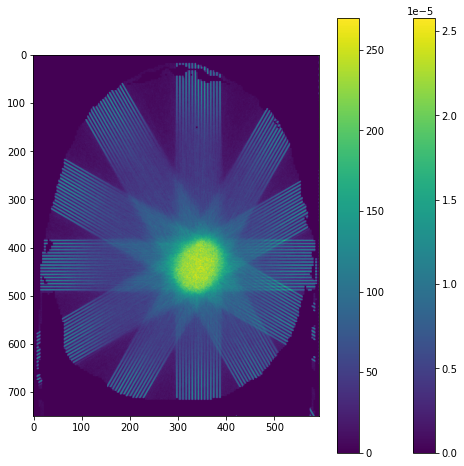

In [5]:
import pydicom
from pydicom.data import get_testdata_file
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy

source1=np.zeros((757,750,593))

for j in np.arange(0,330+1,30):
    for i in np.arange(1,6):
        print(j,i)
        ds = pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_dosetomedium_vhee_shapedbeam_150MV_1M_"+str(j)+"deg__"+str(i)+".dcm")
        ds.PatientName = 'Best SFRT beam 1M 250 MV all angles'+str(j)+'deg'
        ds[0x0020, 0x0032].value= [163.5935,155.156,-811.09]
        #ds.save_as("d:/Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/best_dosetomedium_vhee_shapedbeam_250MV_1M_"+str(j)+"deg__"+str(i)+".dcm")
        source1+=ds.pixel_array*ds.DoseGridScaling
tot_dcm=source1
figure(1,figsize=(8,8))
plt.imshow(tot_dcm[190])
plt.colorbar()
print(tot_dcm.max(),tot_dcm.min())
print(ds.DoseGridScaling) 
tot_dcm=np.around(tot_dcm*1e8)
tot_dcm=tot_dcm.astype(np.uint16)
print(tot_dcm.max(),tot_dcm.min())
ds.PixelData = tot_dcm.tobytes()
ds.DoseGridScaling=1/1e8/1.6021766e-19/((5e6))*0.75e-6
ds[0x0020, 0x0032].value= [163.5935,155.156,-811.09]
ds.PatientName = 'Rates Best sfrt beam 150 MV all angles 5M hist each'
ds.save_as("d:/Desktop/SFRT-Topas/vhee/vhee_patient/shaped_beam/results/key/rate_best_dosetomedium_vhee_shapedbeam_150MV_5M.dcm")
#new_ds= pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/2source_250MV/results/dosetomedium_vhee_2source_250MV_tot.dcm")



#
source2=source1/((5e6))/(1.602e-19)*(0.75e-6)
plt.imshow(source2[332])
plt.colorbar()
